In [1]:
import tequila as tq

In [2]:
mg_d_eq = 2.239
def make_ace_mg_zmatrix(d):
    return f"""
C
C   1  1.490
O   1  1.269  2 122.4
O   1  1.271  2 121.3  3  180.0
H   2  1.089  1 108.3  3  58.25
H   2  1.089  1 108.3  3 -58.25
H   2  1.084  1 110.6  3  180.0
Mg    1  {d:4.3f}  2 180.0  3 0.0"""

In [3]:
molecule0 = tq.chemistry.Molecule(geometry = make_ace_mg_zmatrix(mg_d_eq), basis_set="cc-pvdz", charge=1)
print(molecule0)



felez: [array([ 6.,  6.,  8.,  8.,  1.,  1.,  1., 12.])]
all_fc_known: True
all_fm_known: True
zel: 43.0
fzel: [43.0]
c: [1.0, 0]
fc: [0.0]
m: [1]
fm: [2]
Assess candidate (1.0, (0.0,), 1, (2,)): 1   2   3   4   4-0 5   5-0 6   6-0 7   7-0
Assess candidate (1.0, (0.0,), 1, (2,)): T       T   T   T   T   T   T   T   T   T   --> False
Assess candidate (0, (0.0,), 1, (2,)): T   T   T   T   T       T       T   T   T   --> False
Following warning is harmless if you've altered chgmult through `set_molecular_change` or `set_multiplicity`. Such alterations are an expert feature. Specifying in the original molecule string is preferred.


felez: [array([ 6.,  6.,  8.,  8.,  1.,  1.,  1., 12.])]
all_fc_known: True
all_fm_known: True
zel: 43.0
fzel: [43.0]
c: [1.0, 0]
fc: [0.0]
m: [1]
fm: [2]
Assess candidate (1.0, (0.0,), 1, (2,)): 1   2   3   4   4-0 5   5-0 6   6-0 7   7-0
Assess candidate (1.0, (0.0,), 1, (2,)): T       T   T   T   T   T   T   T   T   T   --> False
Assess candidate (0, (0.0,

In [7]:
molecule0.ref_wfn

In [4]:
molecule1 = tq.chemistry.Molecule(geometry = make_ace_mg_zmatrix(mg_d_eq), basis_set="cc-pvdz", charge=1,
                                 active_orbitals={"A'": [17, 18, 19], 'A"': [3, 4]})



felez: [array([ 6.,  6.,  8.,  8.,  1.,  1.,  1., 12.])]
all_fc_known: True
all_fm_known: True
zel: 43.0
fzel: [43.0]
c: [1.0, 0]
fc: [0.0]
m: [1]
fm: [2]
Assess candidate (1.0, (0.0,), 1, (2,)): 1   2   3   4   4-0 5   5-0 6   6-0 7   7-0
Assess candidate (1.0, (0.0,), 1, (2,)): T       T   T   T   T   T   T   T   T   T   --> False
Assess candidate (0, (0.0,), 1, (2,)): T   T   T   T   T       T       T   T   T   --> False
Following warning is harmless if you've altered chgmult through `set_molecular_change` or `set_multiplicity`. Such alterations are an expert feature. Specifying in the original molecule string is preferred.


felez: [array([ 6.,  6.,  8.,  8.,  1.,  1.,  1., 12.])]
all_fc_known: True
all_fm_known: True
zel: 43.0
fzel: [43.0]
c: [1.0, 0]
fc: [0.0]
m: [1]
fm: [2]
Assess candidate (1.0, (0.0,), 1, (2,)): 1   2   3   4   4-0 5   5-0 6   6-0 7   7-0
Assess candidate (1.0, (0.0,), 1, (2,)): T       T   T   T   T   T   T   T   T   T   --> False
Assess candidate (0, (0.0,

In [5]:
print(molecule1)

<class 'tequila.quantumchemistry.psi4_interface.QuantumChemistryPsi4'>
Qubit Encoding
JordanWigner

Parameters
basis_set       : cc-pvdz         
geometry        : 
C
C   1  1.490
O   1  1.269  2 122.4
O   1  1.271  2 121.3  3  180.0
H   2  1.089  1 108.3  3  58.25
H   2  1.089  1 108.3  3 -58.25
H   2  1.084  1 110.6  3  180.0
Mg    1  2.239  2 180.0  3 0.0 
description     :                 
multiplicity    : 1               
charge          : 1               
closed_shell    : True            
name            : molecule        

Psi4 Data
Point Group (full) : cs              
Point Group (used) : cs              
nirrep          : 2 
irreps          : ["A'", 'A"'] 
mos per irrep   : [62, 27]        
Active Space Data:
active_orbitals : [20, 21, 22, 23, 24] 
reference_orbitals : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20] 
frozen_docc     : [17, 3]         
frozen_uocc     : [42, 22]        

Orbitals:
0 : 0A' energy = -49.343850 
1 : 1A' energy = -20.7

In [6]:
# make the hamiltonian
H = molecule1.make_hamiltonian()
print(f"Hamiltonian qubits: {H.n_qubits}")
print(f"Hamiltonian terms: {len(H)}")

Hamiltonian qubits: 10
Hamiltonian terms: 444


In [7]:
mp2 = molecule1.compute_energy(method="mp2")
print(f"MP2 Energy: {mp2}")
# Note there are known issues for some methods when the active space as frozen virtuals as is the case here
# detci based methods are fine again 
fci = molecule1.compute_energy(method="fci")
print(f"FCI Energy: {fci}")

# for most coupled-cluster like models you can compute amplitudes
# Amplitudes are computed in c1 and in the full space, this is why the active space troubles from above usually don't hold
# Note that amplitudes are in closed-shell
amplitudes = molecule1.compute_amplitudes("mp2")

# you can export a parameter dictionary which holds the indices of the amplitude as keys and values as values
# for this small active space that is only one amplitude for mp2
variables = amplitudes.make_parameter_dictionary()
print(variables)

# similar for ccsd since the singles are 0 due to symmetry (that changes if you change the active space)
amplitudes = molecule1.compute_amplitudes("ccsd")
variables = amplitudes.make_parameter_dictionary()
print(variables)

There are known issues with some psi4 methods and frozen virtual orbitals. Proceed with fingers crossed for mp2.


felez: [array([ 6.,  6.,  8.,  8.,  1.,  1.,  1., 12.])]
all_fc_known: True
all_fm_known: True
zel: 43.0
fzel: [43.0]
c: [1.0, 0]
fc: [0.0]
m: [1]
fm: [2]
Assess candidate (1.0, (0.0,), 1, (2,)): 1   2   3   4   4-0 5   5-0 6   6-0 7   7-0
Assess candidate (1.0, (0.0,), 1, (2,)): T       T   T   T   T   T   T   T   T   T   --> False
Assess candidate (0, (0.0,), 1, (2,)): T   T   T   T   T       T       T   T   T   --> False
Following warning is harmless if you've altered chgmult through `set_molecular_change` or `set_multiplicity`. Such alterations are an expert feature. Specifying in the original molecule string is preferred.
MP2 Energy: -426.6777029446133
FCI Energy: -426.678127055987
{(4, 0, 4, 0): -0.00197525762101874, (2, 0, 2, 0): -0.0015230461112060766, (1, 0, 1, 0): -0.0011831270479546437, (3, 0, 3, 0): -0.0011755520286647998, (1, 0, 4, 0): 0.0009889601008225045, (

In [18]:
threshold=1.0e-6
# make the UCCSD ansatz (note that this will be without singles since it starts from mp2)
#U = molecule1.make_uccsd_ansatz(initial_amplitudes="mp2", threshold=threshold, trotter_steps=1)
U = molecule1.make_upccgsd_ansatz(order=1, name='UpCCGD')

# define the expectationvalue
E = tq.ExpectationValue(H=H, U=U)

# optimize
result = tq.minimize(objective=E, method="BFGS", initial_values=0.0)

# compute a reference value with psi4
#fci = molecule.compute_energy(method="fci")

print("VQE : {:+2.8}f".format(result.energy))
print("FCI : {:+2.8}f".format(fci))

Optimizer: <class 'tequila.optimizers.optimizer_scipy.OptimizerSciPy'> 
backend         : qulacs
device          : None
samples         : None
save_history    : True
noise           : None

Method          : BFGS
Objective       : 1 expectationvalues
gradient        : 20 expectationvalues

active variables : 10

E=-426.67811427  angles= {(((0, 1),), 'D', (None, 0)): 0.0, (((0, 2),), 'D', (None, 0)): 0.0, (((0, 3),), 'D', (None, 0)): 0.0, (((0, 4),), 'D', (None, 0)): 0.0, (((1, 2),), 'D', (None, 0)): 0.0, (((1, 3),), 'D', (None, 0)): 0.0, (((1, 4),), 'D', (None, 0)): 0.0, (((2, 3),), 'D', (None, 0)): 0.0, (((2, 4),), 'D', (None, 0)): 0.0, (((3, 4),), 'D', (None, 0)): 0.0}  samples= None
E=-426.67812212  angles= {(((0, 1),), 'D', (None, 0)): -0.0009918212890625, (((0, 2),), 'D', (None, 0)): -0.0015869140625, (((0, 3),), 'D', (None, 0)): -0.0012969970703125, (((0, 4),), 'D', (None, 0)): -0.0023651123046875, (((1, 2),), 'D', (None, 0)): 0.0, (((1, 3),), 'D', (None, 0)): 0.0, (((1, 4),), 'D

In [22]:
molecule1.compute_energy("hf")



felez: [array([ 6.,  6.,  8.,  8.,  1.,  1.,  1., 12.])]
all_fc_known: True
all_fm_known: True
zel: 43.0
fzel: [43.0]
c: [1.0, 0]
fc: [0.0]
m: [1]
fm: [2]
Assess candidate (1.0, (0.0,), 1, (2,)): 1   2   3   4   4-0 5   5-0 6   6-0 7   7-0
Assess candidate (1.0, (0.0,), 1, (2,)): T       T   T   T   T   T   T   T   T   T   --> False
Assess candidate (0, (0.0,), 1, (2,)): T   T   T   T   T       T       T   T   T   --> False
Following warning is harmless if you've altered chgmult through `set_molecular_change` or `set_multiplicity`. Such alterations are an expert feature. Specifying in the original molecule string is preferred.


felez: [array([ 6.,  6.,  8.,  8.,  1.,  1.,  1., 12.])]
all_fc_known: True
all_fm_known: True
zel: 43.0
fzel: [43.0]
c: [1.0, 0]
fc: [0.0]
m: [1]
fm: [2]
Assess candidate (1.0, (0.0,), 1, (2,)): 1   2   3   4   4-0 5   5-0 6   6-0 7   7-0
Assess candidate (1.0, (0.0,), 1, (2,)): T       T   T   T   T   T   T   T   T   T   --> False
Assess candidate (0, (0.0,

-426.67769187311114

In [19]:
print(fci)
print(mp2)
print(result.energy)

-426.678127055987
-426.6777029446133
-426.67812412490866


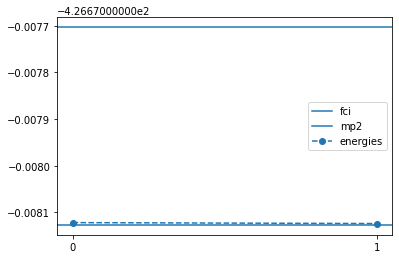

In [20]:
result.history.plot("energies", baselines={"fci":fci,  "mp2":mp2}, filename="McAce_17-3_3-2_result_bfgs")